In [2]:
ROOT::RDataFrame rd("esdTree", "/mnt/d/GoogleDrive/Job/cern/Alice/analysis/data/RhoPrime/2015/245145.AliESDs.root");

Разберем, что означает условие 

trk->IsOn(AliESDtrack::kITSpureSA)

Похоже ITSPureSA означает - ITS pure StandAlone.

Судя по [TDR](https://cds.cern.ch/record/1625842/files/0954-3899_41_8_087002.pdf) под StandAlone track понимается трек восстановленный только на основе данных ITS.

TODO: Тогда не очень понятно что значит ITSRefit?

Итак, в исходном файле лежат, очевидно, только данные, поэтому при инициализации класса его поля заполняются данными, а методы лишь считают что-то на их основе. Таким образом смотрим в исходники [AliESDtrack.h](http://alidoc.cern.ch/AliRoot/master/_ali_e_s_dtrack_8h_source.html) и видим, что
Bool_t IsOn(ULong64_t mask) const {return (fFlags&mask)>0;}

То есть AliESDtrack::kITSpureSA это просто битовая маска для сравнения с параметром fFlags.
ULong64_t   fFlags;        // Reconstruction status flags

ULong64_t GetStatus() const {return fFlags;}


Коды всех постоянных статусов или флагов можно найти в [AliVTrack.h](http://alidoc.cern.ch/AliRoot/master/_ali_v_track_8h_source.html#l00033)

А описание ESD трека здесь - [AliESDtrack.cxx](http://alidoc.cern.ch/AliRoot/master/_ali_e_s_dtrack_8cxx_source.html)

In [3]:
for (const auto &cn:rd.GetColumnNames())
{
    if (cn.find("fFlags") != std::string::npos)
        std::cout << cn << std::endl;
}

Tracks.fFlags
AliESDTrdTrigger.fFlags[18]
TrdTracks.fFlags
TrdTracks.fFlagsTiming


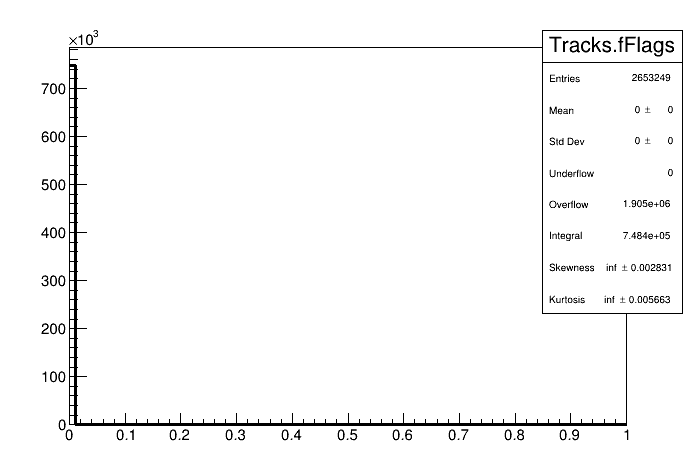

In [4]:
std::string name = "Tracks.fFlags";
//ROOT::RDF::TH1DModel histModel(name.c_str(), name.c_str(), 320, 0, 160);

auto h = rd.Histo1D({name.c_str(), name.c_str(), 100, 0, 1},name);

auto c1 = new TCanvas();
c1->cd();
h->Draw();
c1->Draw()

In [5]:
// rd.Display({"Tracks.fFlags"}).GetPtr()->Print() -- this doesn't work


In [6]:
TFile f("/mnt/d/GoogleDrive/Job/cern/Alice/analysis/data/RhoPrime/2015/245145.AliESDs.root");
TTree* t = nullptr;
f.GetObject("esdTree", t)

In [7]:
t->Show(10)

======> EVENT:10
 AliESDRun.      = (AliESDRun*)0x7fab765d0860
 AliESDRun.TObject.fUniqueID = 0
 AliESDRun.TObject.fBits = 50413568
 AliESDRun.fCurrentL3 = 30000.007812
 AliESDRun.fCurrentDip = 5999.962891
 AliESDRun.fBeamEnergy = 2510.855713
 AliESDRun.fMagneticField = 5.00686
 AliESDRun.fMeanBeamInt[2][2] = 2.31395e+12 , 1.57087e+11 , 2.4387e+12 , 1.65304e+11 

 AliESDRun.fDiamondXY[2] = 0.0687125 , 0.330892 

 AliESDRun.fDiamondCovXY[3] = 1.22637e-05 , 0 , 1.07658e-05 

 AliESDRun.fDiamondZ = 0.724689
 AliESDRun.fDiamondSig2Z = 35.0393
 AliESDRun.fPeriodNumber = 1
 AliESDRun.fRunNumber = 245145
 AliESDRun.fRecoVersion = 0
 AliESDRun.fBeamParticle[2] = 208082 , 208082 

 AliESDRun.fBeamType = A-A
 AliESDRun.fTriggerClasses = TObjArray
 AliESDRun.fDetInDAQ = 1076297727
 AliESDRun.fDetInReco = 2555903
 AliESDRun.fPHOSMatrix[5] = (TGeoHMatrix*)7fab773009c0
 AliESDRun.fEMCALMatrix[22] = (TGeoHMatrix*)7fab55326e90
 AliESDRun.fT0spread[4] = 199.971298 , 198.567642 , 203.980942 , 21.497110 

In [60]:
t->Print()

******************************************************************************
*Tree    :esdTree   : Tree with ESD objects                                  *
*Entries :     3332 : Total =      4734606349 bytes  File  Size = 1927512108 *
*        :          : Tree compression factor =   2.46                       *
******************************************************************************
*Branch  :AliESDRun.                                                         *
*Entries :     3332 : BranchElement (see below)                              *
*............................................................................*
*Br    0 :AliESDRun.TObject.fUniqueID : UInt_t                               *
*Entries :     3332 : Total  Size=      20051 bytes  File Size  =       6322 *
*Baskets :       54 : Basket Size=       2983 bytes  Compression=   2.94     *
*............................................................................*
*Br    1 :AliESDRun.TObject.fBits : UInt_t          

In [10]:
ULong_t fflags = 0;

t->SetBranchAddress("Tracks.fFlags", &fflags);
ULong_t sum = 0;



IncrementalExecutor::executeFunction: symbol '_ZN6TClass8GetClassImEEPS_bb' unresolved while linking function '_GLOBAL__sub_I_cling_module_283'!
You are probably missing the definition of TClass* TClass::GetClass<unsigned long>(bool, bool)
Maybe you need to load the corresponding shared library?


0


In [11]:
for (auto i = 0; i < t->GetEntriesFast(); ++i)
{
    t->GetEntry(i);
    sum+=fflags;
}
std::cout << sum << std::endl;

0
